In [1]:
%%bash
python --version

Python 2.7.12


# Линейная алгебра: сходство текстов и аппроксимация функций

Данное задание основано на материалах секции, посвященной введению в линейную алгебру. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy и SciPy.

### Вы научитесь:

- читать тексты из файла с помощью Python и разбивать их на слова
- переводить тексты в векторные пространства, вычислять расстояния в этих пространствах
- решать системы линейных уравнений
- приближать любые функции с помощью многочленов

### Введение

В этом задании вы познакомитесь с некоторыми базовыми методами из линейной алгебры, реализованными в пакете SciPy — в частности, с методами подсчета косинусного расстояния и решения систем линейных уравнений. Обе эти задачи еще много раз встретятся нам в специализации. Так, на решении систем линейных уравнений основана настройка линейных моделей — очень большого и важного класса алгоритмов машинного обучения. Косинусное расстояние же часто используется в анализе текстов для измерения сходства между ними.

### Материалы

Справка по функциям пакета scipy.linalg: http://docs.scipy.org/doc/scipy/reference/linalg.html

Справка по работе с файлами в Python: https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files

Справка по регулярным выражениям в Python (если вы захотите узнать про них чуть больше): https://docs.python.org/2/library/re.html

### Инструкция по выполнению

Данное задание состоит из двух частей. В каждой ответом будет набор чисел, который вам нужно будет ввести в соответствующее поле через пробел.

**Задача 1: сравнение предложений**

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

- кошки (животные)
- UNIX-утилита cat для вывода содержимого файлов
- версии операционной системы OS X, названные в честь семейства кошачьих

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

Выполните следующие шаги:

1.Скачайте файл с предложениями (sentences.txt).

In [2]:
file = open('sentences.txt')

2.Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().

3.Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

In [3]:
sentences = file.readlines()
file.close()

sentences_initial = sentences
sentences[0]

'In comparison to dogs, cats have not undergone major changes during the domestication process.\n'

In [4]:
import re

def split_sentence(sentence) : 
    sentence = sentence.lower()
    sentence = re.split('[^a-z]', sentence)
    sentence = filter(None, sentence)
    return sentence

sentences = map(split_sentence, sentences)

4.Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [5]:
all_words = []
for sentence in sentences:
    all_words.extend(sentence)
    
from collections import Counter
unique_words = Counter(all_words)

print len(all_words)
print len(unique_words)
print unique_words.most_common(5)

484
254
[('the', 20), ('of', 19), ('to', 14), ('and', 14), ('a', 13)]


5.Создайте матрицу размера n на d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

In [6]:
import numpy as np

In [7]:
matrix = np.zeros((22, 254), dtype=int)

for i in range(len(sentences)):
    for word in sentences[i]:
        j = unique_words.keys().index(word)
        matrix[i, j] = matrix[i, j] + 1

6.Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание.

In [8]:
from scipy.spatial import distance

distances = np.zeros(22, dtype=np.double)
for i in np.arange(1, 22):
    distances[i] = distance.cosine(matrix[0], matrix[i])

In [9]:
max_index = distances.argsort()[:3]
print max_index
print distances[max_index[1]]
print distances[max_index[2]]

[0 6 4]
0.732738758088
0.77708871497


7.Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).

In [10]:
import os

def write_result(task_number, data) : 
    filename = "./results/result%s.txt" % task_number
    directory = os.path.dirname(filename)
    
    if not os.path.exists(directory):
        os.makedirs(directory)

    file = open(filename, 'w')
    for symbol in data:
        file.write(str(symbol) + ' ')
    file.close()

In [11]:
write_result(1, [max_index[1], max_index[2]])

8.Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

In [12]:
print "Первое предложение: \n", sentences_initial[0]
print "1-ое близкое предложение: \n", sentences_initial[max_index[1]]
print "2-ое близкое предложение: \n", sentences_initial[max_index[2]]

Первое предложение: 
In comparison to dogs, cats have not undergone major changes during the domestication process.

1-ое близкое предложение: 
Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).

2-ое близкое предложение: 
In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.



Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

**Задача 2: аппроксимация функции**

Рассмотрим сложную математическую функцию на отрезке [1, 15]:
f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из системы линейных уравнений, где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1.Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [13]:
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline 

def f(x): 
    return np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)

In [14]:
A = [[1, 1], [1, 15]]
b = map(f, np.array([1, 15]))
w = linalg.solve(A, b)

In [17]:
fx = np.linspace(start=1, stop=15, num=100)
fy = map(f, fx)

In [18]:
appx = np.linspace(start=1, stop=15, num=100)
appy = w[0] + w[1] * appx

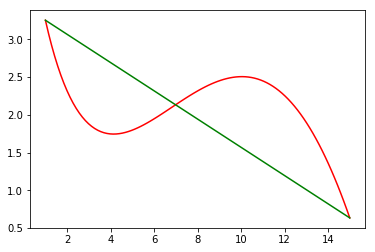

In [19]:
plt.plot(fx, fy, 'r', appx, appy, 'g')
plt.show()

2.Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?


In [20]:
A = [[1, 1, 1], [1, 8, 8*8], [1, 15, 15*15]]
b = map(f, np.array([1, 8, 15]))
w = linalg.solve(A, b)

In [21]:
appx = np.linspace(start=1, stop=15, num=100)
appy = w[0] + w[1] * appx + w[2] * appx * appx

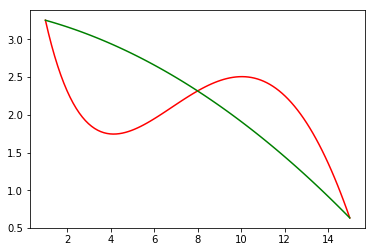

In [22]:
plt.plot(fx, fy, 'r', appx, appy, 'g')
plt.show()

3.Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [23]:
A = [[1, 1, 1, 1], [1, 4, 4**2, 4**3], [1, 10, 10**2, 10**3], [1, 15, 15**2, 15**3]]
b = map(f, np.array([1, 4, 10, 15]))
w = linalg.solve(A, b)

In [24]:
appx = np.linspace(start=1, stop=15, num=100)
appy = w[0] + w[1]*appx + w[2]*appx**2 + w[3]*appx**3

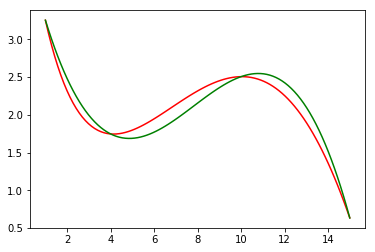

In [25]:
plt.plot(fx, fy, 'r', appx, appy, 'g')
plt.show()

In [26]:
w

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [27]:
w = map(lambda x: '%.2f' % x, w)

In [28]:
write_result(2, w)